# Distance plot

In [ ]:
!pip install -U scikit-learn

In [1]:
#!pip install -U scikit-learn
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
tools_ref = ['bbh', 'domainoid', 'ensamble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools = ['busco_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2']
path = '../../results/qfo_input/'
all_pairs = set()

In [7]:
def create_set_of_pairs(path, all_pairs):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = '_'.join(sorted(line.split('\t')))
        pairs_set.add(pairs)
        all_pairs.add(pairs)
    #print(len(lines))
    #print(len(pairs_set))
    return pairs_set, all_pairs

In [8]:
list_of_sets_ref = []
dict_of_sets = {}
for i in tools_ref:
    pairs_set, all_pairs = create_set_of_pairs(path + i + '.tsv', all_pairs)
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set

In [9]:
list_of_sets = []
for t in tools:
    print(t)
    pairs_set, all_pairs = create_set_of_pairs(path + t + '.tsv', all_pairs)
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

busco_metazoa_augustus_gallus_v2
fdog_assembly_metazoa_augustus_gallus_v2
busco_metazoa_metaeuk_gallus_v2
fdog_assembly_metazoa_metaeuk_gallus_v2


# Create matrix

In [10]:
all_tools = tools + tools_ref
df = pd.DataFrame(index=list(all_pairs), columns=list(all_tools))

In [11]:
def fill_df(df, dict_of_sets):
    for tool in dict_of_sets:
        for pair in dict_of_sets[tool]:
            df.loc[pair,tool] = 1
    return df.fillna(0)

In [12]:
df = fill_df(df, dict_of_sets)
df = df.transpose()

/tmp/ipykernel_3722876/4043747138.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.fillna(0)


In [12]:
display(df)

,A0A1D5PW90_Q96HA8,A7RTE1_Q5F1R6,Q0VA36_Q5SWX8,A7ST51_P83731,Q5C9Z4_Q9W020,O14662_T1FNF4,B7PJ43_Q96A33,O14662_P91409,A0A8J0QG19_Q8TB61,A7S567_Q12768,...,A0A3Q3B0J0_P49366,P62250_Q9W237,A0A8I6A4K6_O95456,B7ZTD7_Q9VYX5,O15258_Q498C8,B7P2V3_O60524,Q16739_Q21053,A4VCH4_Q7Z3J2,Q8SZU6_Q9H0E2,A7S6Z4_O43148
busco_metazoa_augustus,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,1,1,1,1,0,1
fdog_assembly_metazoa_augustus,1,1,1,0,1,1,1,0,1,0,...,0,1,1,1,1,1,0,1,0,1
busco_metazoa_metaeuk,1,1,1,0,1,1,1,0,1,0,...,0,1,1,1,1,1,0,1,0,1
fdog_assembly_metazoa_metaeuk,1,1,0,0,1,1,1,0,1,1,...,0,0,1,1,1,0,0,1,1,1
bbh,1,1,1,0,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,0,1
domainoid,1,1,1,0,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,0,1
ensamble,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,1,0,0,1,0,1
hieranoid,1,1,1,0,1,1,1,0,1,0,...,0,1,1,1,1,1,0,1,0,1
inparanoid,1,1,1,0,1,1,1,0,1,0,...,0,1,1,1,1,1,0,1,0,1
metaphors,1,1,0,1,1,1,1,0,1,0,...,0,0,1,1,1,1,0,1,0,1


## TSNE

In [13]:
df_embedded = TSNE(n_components=2, random_state=42, perplexity=2).fit_transform(df)
print(df_embedded)

[[-24.093773   35.022667 ]
 [  5.4188895 -12.422695 ]
 [ -9.571305   25.754353 ]
 [  5.872408   31.419796 ]
 [ -2.6935754 -36.501427 ]
 [-47.53034   -27.059174 ]
 [-43.048397  -54.251175 ]
 [ 69.4624     74.63669  ]
 [ 65.08405    84.68082  ]
 [ 46.896675  -36.670185 ]
 [ 68.58913   100.753006 ]
 [-21.013805   -8.564442 ]
 [ 30.704649  -33.44112  ]
 [-10.638808  -25.401808 ]
 [-64.03913   -23.327074 ]
 [  1.8350955 -53.579853 ]
 [-21.874958  -32.212383 ]]


In [14]:
df_embedded.shape

results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

                                       tools        PC1         PC2
0           busco_metazoa_augustus_gallus_v2 -24.093773   35.022667
1   fdog_assembly_metazoa_augustus_gallus_v2   5.418890  -12.422695
2            busco_metazoa_metaeuk_gallus_v2  -9.571305   25.754353
3    fdog_assembly_metazoa_metaeuk_gallus_v2   5.872408   31.419796
4                                        bbh  -2.693575  -36.501427
5                                  domainoid -47.530338  -27.059174
6                                   ensamble -43.048397  -54.251175
7                                  hieranoid  69.462402   74.636688
8                                 inparanoid  65.084053   84.680817
9                                  metaphors  46.896675  -36.670185
10                                 oma_pairs  68.589127  100.753006
11                                 orthoffgc -21.013805   -8.564442
12                               orthofinder  30.704649  -33.441120
13                            orthoinspector -10

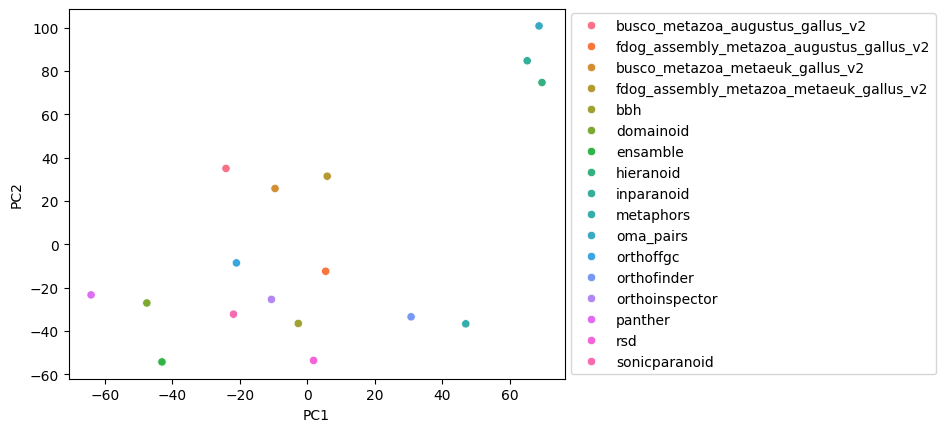

In [15]:
fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_embedded = pca.fit_transform(df_embedded)

In [17]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

                                       tools         PC1        PC2
0           busco_metazoa_augustus_gallus_v2   11.433387 -42.291611
1   fdog_assembly_metazoa_augustus_gallus_v2   -8.851521   9.771654
2            busco_metazoa_metaeuk_gallus_v2   12.720253 -25.111748
3    fdog_assembly_metazoa_metaeuk_gallus_v2   26.512608 -16.146458
4                                        bbh  -32.987503  17.712145
5                                  domainoid  -52.306889 -23.836050
6                                   ensamble  -71.385147  -3.948550
7                                  hieranoid   99.222755   8.845941
8                                 inparanoid  104.637657  -0.679456
9                                  metaphors   -3.396006  57.506168
10                                 oma_pairs  119.603210  -7.508307
11                                 orthoffgc  -21.608221 -13.698326
12                               orthofinder  -10.517621  42.610157
13                            orthoinspector  -2

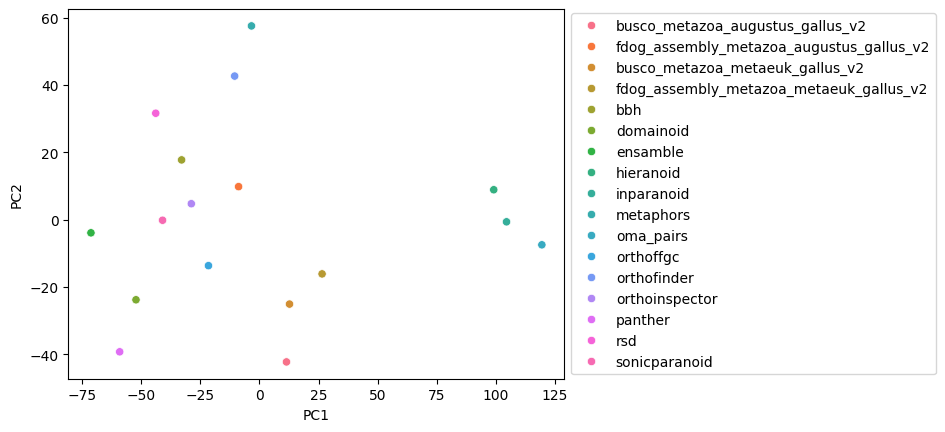

In [18]:
fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# MDS

In [19]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [20]:
mds = MDS(random_state=0)
df_embedded = mds.fit_transform(df)
print(df_embedded)

[[-24.15333782  28.2985013 ]
 [ 10.5215119   27.02664491]
 [ 23.48702537  17.53925189]
 [ -0.46991657  33.5690693 ]
 [ -4.78061821  -8.21521106]
 [ -0.37671416   4.93759119]
 [-15.44347005 -38.11660859]
 [-17.61956394   2.74232651]
 [-11.54137418   6.21295606]
 [ 34.83102328 -11.36535394]
 [-29.79652002  -2.48361184]
 [ 15.93775297   4.05122001]
 [ 14.7351143  -13.37865899]
 [  1.87361624  -3.87256281]
 [  8.21819581 -25.72194098]
 [-13.54552468 -15.56811974]
 [  8.1227998   -5.65549322]]


                                       tools        PC1        PC2
0           busco_metazoa_augustus_gallus_v2 -24.153338  28.298501
1   fdog_assembly_metazoa_augustus_gallus_v2  10.521512  27.026645
2            busco_metazoa_metaeuk_gallus_v2  23.487025  17.539252
3    fdog_assembly_metazoa_metaeuk_gallus_v2  -0.469917  33.569069
4                                        bbh  -4.780618  -8.215211
5                                  domainoid  -0.376714   4.937591
6                                   ensamble -15.443470 -38.116609
7                                  hieranoid -17.619564   2.742327
8                                 inparanoid -11.541374   6.212956
9                                  metaphors  34.831023 -11.365354
10                                 oma_pairs -29.796520  -2.483612
11                                 orthoffgc  15.937753   4.051220
12                               orthofinder  14.735114 -13.378659
13                            orthoinspector   1.873616  -3.87

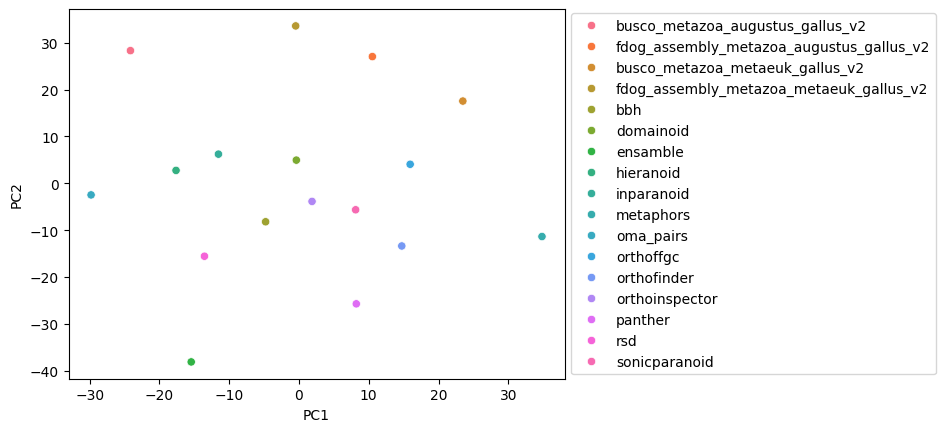

In [21]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
#with euklidian distance
dist_euclid = euclidean_distances(df)
print(dist_euclid)
print(len(dist_euclid))
mds_eu = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
df_embedded = mds_eu.fit_transform(dist_euclid)

[[ 0.         42.14261501 41.01219331 46.86149806 41.50903516 43.12771731
  55.34437641 44.79955357 44.13615298 51.30302135 47.85394446 42.43819035
  44.62062303 41.89272013 47.14870094 44.64302857 43.06971093]
 [42.14261501  0.         39.74921383 38.28837944 36.6469644  37.30951621
  50.24937811 39.33192088 38.23610859 47.20169488 41.85689907 38.89730068
  39.98749805 35.98610843 42.27292278 39.23009049 38.01315562]
 [41.01219331 39.74921383  0.         35.60898763 34.94281042 36.05551275
  51.01960408 38.79432948 38.31448812 45.7383865  43.24349662 36.48287269
  36.97296309 34.62657939 40.48456496 38.71692137 35.17101079]
 [46.86149806 38.28837944 35.60898763  0.         40.01249805 40.24922359
  52.23983155 42.53234064 41.80908992 48.02082881 45.40925016 42.10700654
  41.89272013 39.25557285 45.26588119 41.50903516 41.21892769]
 [41.50903516 36.6469644  34.94281042 40.01249805  0.         24.06241883
  45.58508528 28.91366459 27.14774392 40.75536774 35.31288717 27.4226184
  27.8567

                                       tools        PC1        PC2
0           busco_metazoa_augustus_gallus_v2 -24.153338  28.298501
1   fdog_assembly_metazoa_augustus_gallus_v2  10.521512  27.026645
2            busco_metazoa_metaeuk_gallus_v2  23.487025  17.539252
3    fdog_assembly_metazoa_metaeuk_gallus_v2  -0.469917  33.569069
4                                        bbh  -4.780618  -8.215211
5                                  domainoid  -0.376714   4.937591
6                                   ensamble -15.443470 -38.116609
7                                  hieranoid -17.619564   2.742327
8                                 inparanoid -11.541374   6.212956
9                                  metaphors  34.831023 -11.365354
10                                 oma_pairs -29.796520  -2.483612
11                                 orthoffgc  15.937753   4.051220
12                               orthofinder  14.735114 -13.378659
13                            orthoinspector   1.873616  -3.87

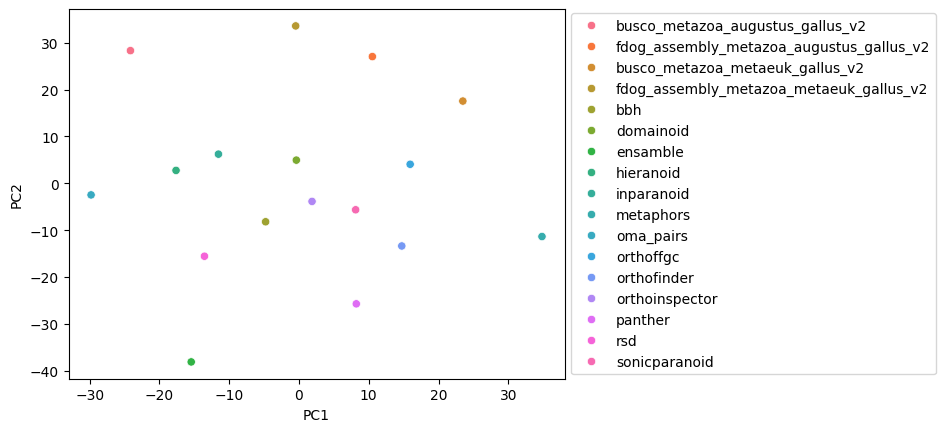

In [23]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# UMAP

In [24]:
!pip uninstall umap --yes
!pip install umap-learn

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 31.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.0 MB/s eta 0:00:00eta 0:00:01
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 19.1 MB/s eta 0:00:00:00:0100:01


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

/home/hannah/anaconda3/envs/jupyter/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
df_embedded= umap.UMAP(n_neighbors=15).fit_transform(df)
df_embedded.shape

(17, 2)

                                       tools        PC1        PC2
0           busco_metazoa_augustus_gallus_v2   9.908206  10.524170
1   fdog_assembly_metazoa_augustus_gallus_v2   9.592005  11.315382
2            busco_metazoa_metaeuk_gallus_v2  10.302195  10.911022
3    fdog_assembly_metazoa_metaeuk_gallus_v2  10.817483  10.973465
4                                        bbh  10.560157  11.676556
5                                  domainoid  11.807817  12.398762
6                                   ensamble  10.825202  12.516440
7                                  hieranoid  11.401855  10.266684
8                                 inparanoid  11.925339  11.253470
9                                  metaphors  11.115639  13.238557
10                                 oma_pairs  12.041566  10.568848
11                                 orthoffgc   9.932945  11.922562
12                               orthofinder  10.547141  13.508085
13                            orthoinspector  10.100636  12.50

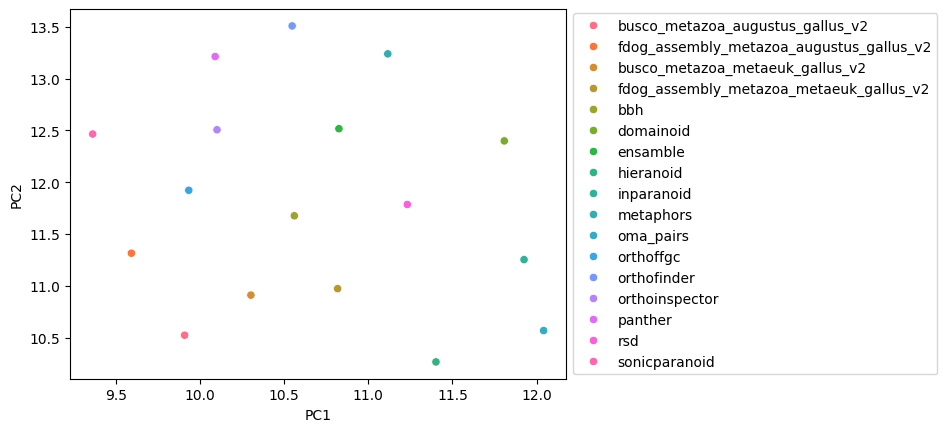

In [27]:
results = pd.DataFrame()
results['tools'] = all_tools
results["PC1"] = df_embedded[:,0]
results["PC2"] = df_embedded[:,1]
print(results)

fig = sb.scatterplot(data=results, x="PC1", y="PC2", hue='tools')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Heat map

In [21]:
test_df = pd.DataFrame({'A':[1,0,0,1], 'B':[1,1,0,0]}, index=['X','Y','Z','K'])
print(test_df)

   A  B
X  1  1
Y  0  1
Z  0  0
K  1  0


In [22]:
logical_and = test_df['A'] & test_df['B']
print(logical_and)

X    1
Y    0
Z    0
K    0
dtype: int64


In [30]:
#print(df.loc['busco_metazoa_augustus'])

In [31]:
def fill_nr_pairs_matrix(df, all_tools, normalize):
    dict_nr_pairs = {}
    for i in all_tools:
        nr_pairs_per_tool = []
        for j in all_tools:
            same_pairs = df.loc[i] & df.loc[j] 
            nr_shared_pairs = same_pairs.sum()
            if normalize == True:
                nr_og = df.loc[i].sum()
                nr_shared_pairs = nr_shared_pairs / nr_og
            nr_pairs_per_tool.append(nr_shared_pairs)
        dict_nr_pairs[i] = nr_pairs_per_tool
    
    df_nr_pairs = pd.DataFrame(dict_nr_pairs, index=all_tools, columns=all_tools)
    return df_nr_pairs
        

In [32]:
df_pairs = fill_nr_pairs_matrix(df,all_tools, False)
df_pairs.head()

,busco_metazoa_augustus_gallus_v2,fdog_assembly_metazoa_augustus_gallus_v2,busco_metazoa_metaeuk_gallus_v2,fdog_assembly_metazoa_metaeuk_gallus_v2,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,8567,7517,7753,7235,7791,7826,6836,7491,7553,7457,7125,7691,7974,7909,7625,7590,7919
fdog_assembly_metazoa_augustus_gallus_v2,7517,8243,7642,7438,7819,7898,6943,7559,7634,7497,7232,7673,8008,7977,7681,7655,7962
busco_metazoa_metaeuk_gallus_v2,7753,7642,8621,7726,8069,8133,7093,7769,7820,7754,7362,7953,8313,8214,7944,7864,8255
fdog_assembly_metazoa_metaeuk_gallus_v2,7235,7438,7726,8099,7618,7712,6769,7356,7419,7386,7005,7471,7858,7782,7478,7491,7763
bbh,7791,7819,8069,7618,8738,8552,7414,8162,8244,8028,7732,8301,8667,8703,8207,8405,8684


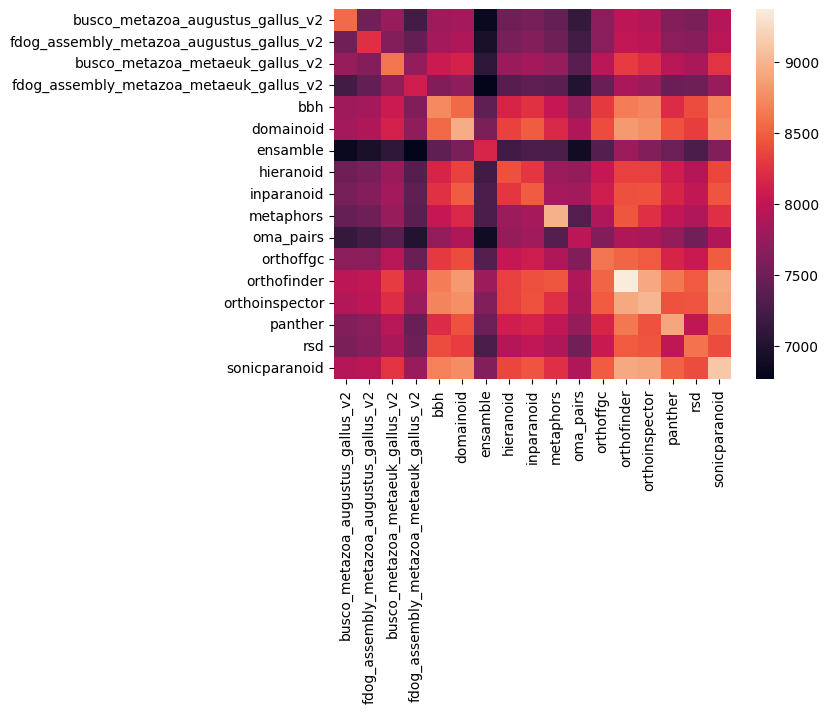

In [33]:
heatmap = sb.heatmap(df_pairs)

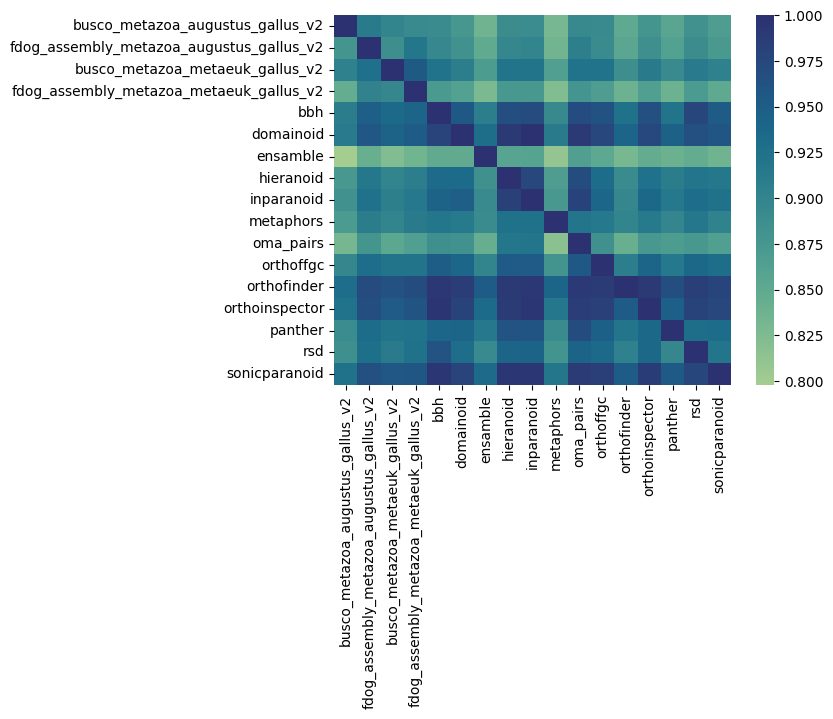

In [34]:
df_pairs_normalized = fill_nr_pairs_matrix(df,all_tools, True)
df_pairs.head()
heatmap = sb.heatmap(df_pairs_normalized, cmap="crest")

In [35]:
def filter_heatmap_data(df, tools_list, tools_ref):
    df_col = df.loc[tools_list].copy()
    filtered_df = df_col[tools_ref]
    return filtered_df
    

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,0.891623,0.874902,0.836925,0.889456,0.889949,0.830493,0.893641,0.892642,0.850832,0.878192,0.856164,0.881943,0.867741
fdog_assembly_metazoa_augustus_gallus_v2,0.894827,0.882951,0.850024,0.897530,0.899493,0.834948,0.907061,0.890552,0.854460,0.885743,0.862452,0.889496,0.872452
busco_metazoa_metaeuk_gallus_v2,0.923438,0.909223,0.868389,0.922465,0.921409,0.863571,0.923366,0.923050,0.887004,0.912059,0.891983,0.913781,0.904558
fdog_assembly_metazoa_metaeuk_gallus_v2,0.871824,0.862158,0.828722,0.873427,0.874160,0.822586,0.878590,0.867108,0.838455,0.864091,0.839659,0.870439,0.850647


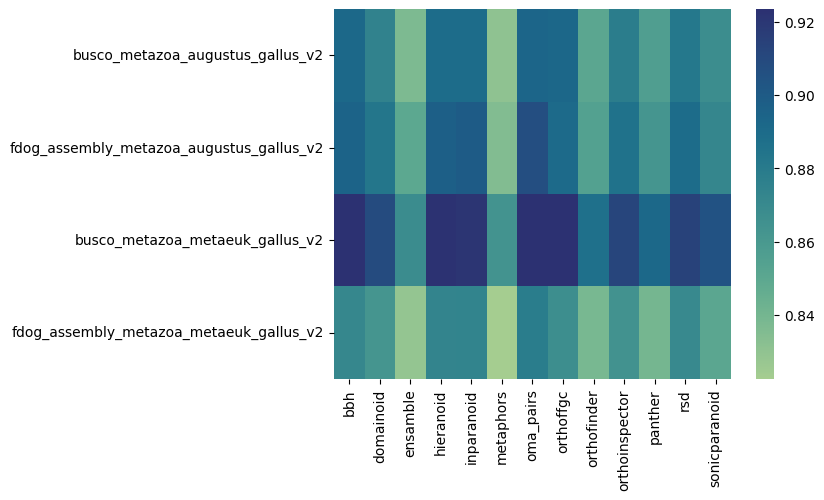

In [36]:
df_filtered = filter_heatmap_data(df_pairs_normalized, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,7791,7826,6836,7491,7553,7457,7125,7691,7974,7909,7625,7590,7919
fdog_assembly_metazoa_augustus_gallus_v2,7819,7898,6943,7559,7634,7497,7232,7673,8008,7977,7681,7655,7962
busco_metazoa_metaeuk_gallus_v2,8069,8133,7093,7769,7820,7754,7362,7953,8313,8214,7944,7864,8255
fdog_assembly_metazoa_metaeuk_gallus_v2,7618,7712,6769,7356,7419,7386,7005,7471,7858,7782,7478,7491,7763


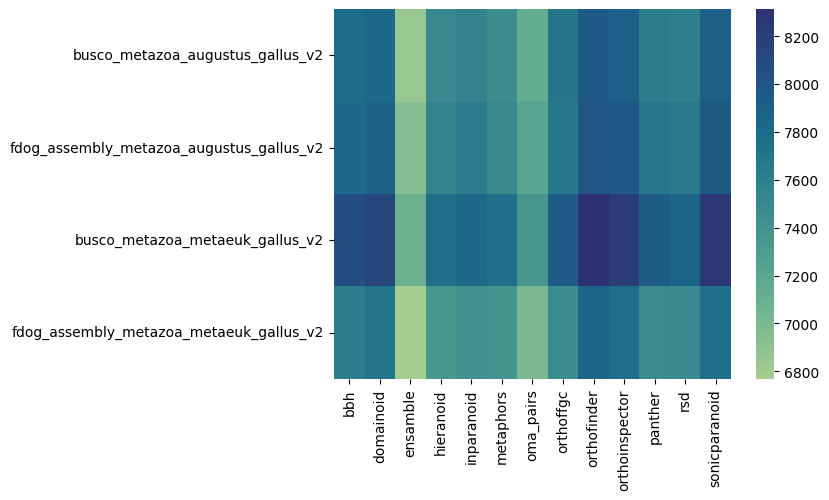

In [37]:
df_filtered = filter_heatmap_data(df_pairs, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")

,bbh,domainoid,ensamble,hieranoid,inparanoid,metaphors,oma_pairs,orthoffgc,orthofinder,orthoinspector,panther,rsd,sonicparanoid
busco_metazoa_augustus_gallus_v2,0.891623,0.874902,0.836925,0.889456,0.889949,0.830493,0.893641,0.892642,0.850832,0.878192,0.856164,0.881943,0.867741
fdog_assembly_metazoa_augustus_gallus_v2,0.894827,0.882951,0.850024,0.897530,0.899493,0.834948,0.907061,0.890552,0.854460,0.885743,0.862452,0.889496,0.872452
busco_metazoa_metaeuk_gallus_v2,0.923438,0.909223,0.868389,0.922465,0.921409,0.863571,0.923366,0.923050,0.887004,0.912059,0.891983,0.913781,0.904558
fdog_assembly_metazoa_metaeuk_gallus_v2,0.871824,0.862158,0.828722,0.873427,0.874160,0.822586,0.878590,0.867108,0.838455,0.864091,0.839659,0.870439,0.850647


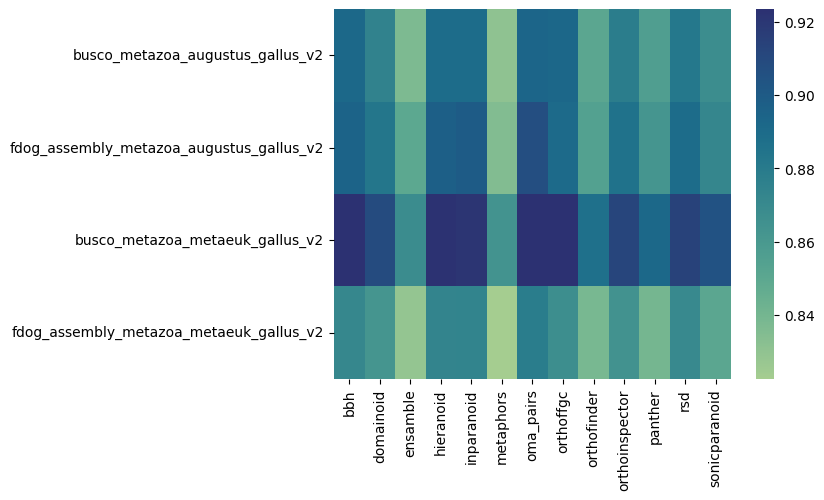

In [38]:
df_filtered = filter_heatmap_data(df_pairs_normalized, tools, tools_ref)
display(df_filtered)
heatmap = sb.heatmap(df_filtered, cmap="crest")